<a href="https://colab.research.google.com/github/tommyliverani/RulFramework/blob/main/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
import tensorflow_datasets as tfds
from Model import Model

In [38]:
fig_size=(9, 3)
def plot_rul(pred=None, target=None,
        stddev=None,
        q1_3=None,
        same_scale=True,
        figsize=fig_size, autoclose=True):
    if autoclose:
        plt.close('all')
    plt.figure(figsize=figsize)
    if target is not None:
        plt.plot(range(len(target)), target, label='target',
                color='tab:orange')
    if pred is not None:
        if same_scale or target is None:
            ax = plt.gca()
        else:
            ax = plt.gca().twinx()
        ax.plot(range(len(pred)), pred, label='pred',
                color='tab:blue')
       # if stddev is not None:
       #     ax.fill_between(range(len(pred)),
       #             pred-stddev, pred+stddev,
       #             alpha=0.3, color='tab:blue', label='+/- std')
        if q1_3 is not None:
            ax.fill_between(range(len(pred)),
                    q1_3[0], q1_3[1],
                    alpha=0.3, color='tab:blue', label='1st/3rd quartile')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [39]:
class Model:
  def __init__(self, input_featurs, output_featur):
      self.net=None
      self.input_featurs=input_featurs
      self.output_featur=output_featur
  
  def build_net(self,hidden,optimizer='Adam',loss='mae'):
    model_in = keras.Input(shape=len(self.input_featurs), dtype='float32')
    x = model_in
    for h,activation in hidden:
      x = layers.Dense(h, activation=activation)(x)
    model_out = layers.Dense(1)(x)
    model = keras.Model(model_in, model_out)
    model.compile(optimizer=optimizer, loss=loss)     
    self.net=model

  def import_model(self,net):
    self.net=net
  
  def train(self,train_set, batch_size=10, validation_split=0.2, epochs=20, verbose=1, callbacks=[tf.keras.callbacks.EarlyStopping(patience=2)]):
    return self.net.fit(train_set[self.input_featurs], train_set[self.output_featur],batch_size=batch_size, validation_split=validation_split,epochs=epochs, verbose=verbose, callbacks=callbacks)
  
  def predict(self,set):
    return self.net.predict(set[self.input_featurs]).ravel()

In [40]:
url = 'https://raw.githubusercontent.com/tommyliverani/RulPrediction/main/data/'


data= pd.read_csv(url + 'final_normal_rul_data.csv')
dt_in = list(data.columns[5:-3])

In [41]:
model=Model(dt_in,'rul')

In [42]:
model.build_net([[64,'relu'],[64,'relu'],[64,'relu'],[64,'relu']])

In [43]:
model.net.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 60)]              0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)                3904      
_________________________________________________________________
dense_12 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_13 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_14 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 65        
Total params: 16,449
Trainable params: 16,449
Non-trainable params: 0
_______________________________________________________

In [44]:
model.train(data)

Epoch 1/20
6592/6592 [==============================] - 11s 2ms/step - loss: 0.1052 - val_loss: 0.2011
Epoch 2/20
6592/6592 [==============================] - 10s 1ms/step - loss: 0.0565 - val_loss: 0.2030
Epoch 3/20
6592/6592 [==============================] - 10s 2ms/step - loss: 0.0429 - val_loss: 0.2002
Epoch 4/20
6592/6592 [==============================] - 10s 2ms/step - loss: 0.0368 - val_loss: 0.1924
Epoch 5/20
6592/6592 [==============================] - 10s 2ms/step - loss: 0.0311 - val_loss: 0.2014
Epoch 6/20
6592/6592 [==============================] - 10s 2ms/step - loss: 0.0283 - val_loss: 0.2046


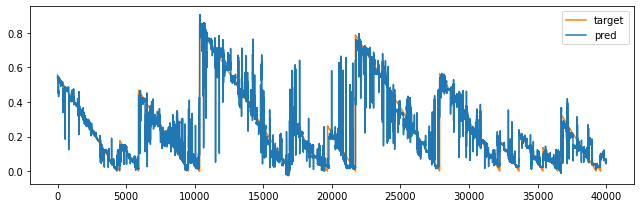

In [45]:
stop=40000
plot_rul(model.predict(data)[:stop],data['rul'][:stop])